Import Libraries

In [1]:
# import all important libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Gathering Data

Sources:

1. twitter_archive_enhanced.csv

2. image_predictions.tsv: Programmatic download from Udacity's server

3. Twitter API

1. CSV file: twitter_archive_enhanced.csv

In [2]:
# Use pandas to read Twitter archive csv file and create twitter_archive_df
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Programmatic download from Udacity's server

In [3]:
# Create folder 
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Use requests to programmatic download "image_predictions.tsv" from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Write tsv file
with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

# Open tsv file and create img_predictions_df
img_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Twitter API

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

read tweet_json.txt

In [4]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_list)
api_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


Assessing Data

Now we have 3 DataFrames:

1. twitter_archive_df

2. img_predictions_df

3. api_df

twitter_archive_df

In [5]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
# all the denominators should be 10
twitter_archive_df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [9]:
twitter_archive_df.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

img_predictions_df

In [10]:
img_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


api_df

In [13]:
api_df

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [14]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [15]:
api_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


Issues Summary:

Some issues are found visually via spreadsheet software (eg. Excel)

Some issues are detected programatically:

Quality (issues with content)

1. twitter_archive_df:

1.1 Only want original ratings (Delete the 181 retweets and 78 replies).

1.2 Don't need those columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'img_num', 'expanded_urls' and 'jpg_url'.

1.3 All rating_denominator should be "10" and some rating_numerators are extreme values.

1.4 Since all the denominator is 10 after last step, we can get rid of rating_denominator column and change rating_numerators to 'rating'.

1.5 Many dog names are meesed up, such as "such" "a" "quite"...

1.6 timestamp have extra "+0000".

1.7 timestamp's datatype should be converted to "datatime".

2. img_predictions_df:

2.1 Remove "_" and capitalize the image predictions.(p1, p2, p3 column names)

Tidiness (issues with structure)

0. Join 3 DataFrames.

1. twitter_archive_df:

1.1 Dog stage's 4 variables: doggo, floofer, pupper, puppo should be in single column of Categorical variable.

1.2 Dog stage have 'None' instead of np.nan.

2. img_predictions_df:

2.1 Image prediction should be summarized to one column 'dog_breed'.

Cleaning Data

First we need to create copies for each df.

In [16]:
# Create df copies
twitter_archive_df_clean = twitter_archive_df.copy()
img_predictions_df_clean = img_predictions_df.copy()
api_df_clean = api_df.copy()

Tidiness Issue 0

Define 0.: Join 3 DataFrames

Tidiness Issue 0
Define 0.: Join 3 DataFrames

Code 0.: Inner join twitter_archive_df_clean, img_predictions_df_clean, and api_df_clean on tweet_id.

In [17]:
# merge 'twitter_archive_df_clean' and 'img_predictions_df_clean'
master_df_clean = pd.merge(twitter_archive_df_clean, img_predictions_df_clean,
                                   how = 'inner', on = 'tweet_id')
# merge 'master_df_clean' and 'api_df_clean'
master_df_clean = pd.merge(master_df_clean, api_df_clean,
                                   how = 'inner', on = 'tweet_id')

Test 0.

In [18]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

Tidiness Issue 1.1

Define 1.1: Dog stage's 4 variables: doggo, floofer, pupper, puppo should be in single column of Categorical variable.

Code 1.1: Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column.

In [19]:
# Extracting the dog stage variables from the text column when available 
master_df_clean['dog_stage'] = master_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
master_df_clean = master_df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

Test 1.1

In [20]:
master_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN


In [21]:
master_df_clean.dog_stage.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stage, dtype: int64

Tidiness Issue 1.2

Define 1.2: Dog stage have 'None' instead of np.nan

Code 1.2: Replace 'None' to np.nan

In [22]:
master_df_clean['dog_stage'].replace('None', np.nan, inplace=True)

Test 1.2

In [23]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 

Quality Issue 1.1

Define 1.1: 1.1 Only want original ratings (Delete retweets and replies).

Code 1.1: Select the rows from twitter_archive_df that retweeted_status_id and in_reply_to_user_id columns that is null

In [24]:
# Drop retweets
master_df_clean = master_df_clean[master_df_clean.retweeted_status_id.isnull()]

In [25]:
# Drop 78 replies
master_df_clean = master_df_clean[master_df_clean.in_reply_to_user_id.isnull()]

Test 1.1

In [26]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null int64
p1                            1971 non-null object
p1_conf                       1971 non-null float64
p1_dog                        1971 non-n

Quality Issue 1.2

Define 1.2: Only want tweets with image.

Code 1.2:  Remove columns: 1.in_reply_to_status_id, 2.in_reply_to_user_id, 3.retweeted_status_id, 4.retweeted_status_user_id, 5.retweeted_status_timestamp, 6.img_num

In [27]:
# Drop extra columns
master_df_clean = master_df_clean.drop(columns=['in_reply_to_status_id', 
                                                'in_reply_to_user_id', 
                                                'retweeted_status_id', 
                                                'retweeted_status_user_id', 
                                                'retweeted_status_timestamp',
                                                'img_num',
                                                'expanded_urls',
                                                'jpg_url'])

Test 1.2

In [28]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
dog_stage             322 non-null object
dtypes: bool(3), float64(3), int64(5), object(8)
memory usage: 267.5+ KB


Quality Issue 1.3

Define 1.3.1: All rating_denominator should be "10".

In [29]:
master_df_clean.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

Code 1.3.1: Drop rows where denominator of rating != 10

In [30]:
master_df_clean.drop(master_df_clean[master_df_clean.rating_denominator != 10].index, inplace = True)

Test 1.3.1

In [31]:
master_df_clean.rating_denominator.value_counts()

10    1954
Name: rating_denominator, dtype: int64

Define 1.3.2: Some rating_numerators are extreme values.

In [32]:
master_df_clean.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       149
8        95
7        51
5        33
14       33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
26        1
27        1
75        1
0         1
Name: rating_numerator, dtype: int64

Code 1.3.2: Drop rows where numerator rating >> 10

In [33]:
master_df_clean.drop(master_df_clean[master_df_clean.rating_numerator > 15].index, inplace = True)

Test 1.3.2

In [34]:
master_df_clean.rating_numerator.value_counts()

12    446
10    417
11    392
13    253
9     149
8      95
7      51
14     33
5      33
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

Quality Issue 1.4
Define 1.4: Since all the denominator is 10 after last step, we can get rid of rating_denominator column and change rating_numerators to 'rating'.

Code 1.4: Drop rating_denominator column

In [35]:
# Drop column
master_df_clean = master_df_clean.drop(columns=['rating_denominator'])
# Change column name
master_df_clean.rename(index=str, columns={"rating_numerator": "rating"}, inplace=True)

Test 1.4

In [36]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 18 columns):
tweet_id          1949 non-null int64
timestamp         1949 non-null object
source            1949 non-null object
text              1949 non-null object
rating            1949 non-null int64
name              1949 non-null object
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null bool
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null bool
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 non-null bool
favorite_count    1949 non-null int64
retweet_count     1949 non-null int64
dog_stage         315 non-null object
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 249.3+ KB


Quality Issue 1.5

Define 1.5: Many dog names are meesed up, such as "such" "a" "quite"

In [37]:
# Check for incorrect names
list(master_df_clean.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',

Code 1.5: We find all the incorrect names have lowercase first letters. We will change those names to None, then change all the None to np.nan

In [38]:
# Define function to replace incorrect names to 'None'
def incorrect_name(row):
    if row['name'][0].islower() == True:
        return 'None'
    else:
        return row['name']
    
# Call function and apply by columns
master_df_clean['name'] = master_df_clean.apply(incorrect_name, axis = 1)

# Change all the'None' in names to np.nan
master_df_clean['name'].replace('None', np.nan, inplace=True)

Test 1.5

In [39]:
list(master_df_clean.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 nan,
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 nan,
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 'Cash',
 'Jed',
 nan,
 'Sebastian',
 nan,
 'Sierra',
 nan,
 nan,
 'Monkey',
 nan,
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 nan,
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 nan,
 'Cooper',
 nan,
 'Harold',
 'Shikha

Quality Issue 1.6

Define 1.6: timestamp have extra "+0000".

Quality Issue 1.7

Define 1.7: timestamp's datatype should be converted to "datatime".

In [40]:
master_df_clean.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-20 16:49:33 +0000
20      2017-07-19 16:06:48 +0000
21      2017-07-19 03:39:09 +0000
22      2017-07-19 00:47:34 +0000
23      2017-07-18 16:08:03 +0000
24      2017-07-18 00:07:08 +0000
25      2017-07-17 16:17:36 +0000
26      2017-07-16 23:58:41 +0000
27      2017-07-16 20:14:00 +0000
28      2017-07-15 23:25:31 +0000
29      2017-0

Code 1.6: Use str.strip to remove "+0000"

Code 1.7: Use pd.to_datetime convert timestamp's datatype

In [41]:
# Strip +0000 from timestamp column
master_df_clean.timestamp = master_df_clean.timestamp.str.strip('+0000')

# Convert data type to datetime
master_df_clean.timestamp = pd.to_datetime(master_df_clean.timestamp)

Test 1.6

Test 1.7

In [42]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 18 columns):
tweet_id          1949 non-null int64
timestamp         1949 non-null datetime64[ns]
source            1949 non-null object
text              1949 non-null object
rating            1949 non-null int64
name              1343 non-null object
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null bool
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null bool
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 non-null bool
favorite_count    1949 non-null int64
retweet_count     1949 non-null int64
dog_stage         315 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 329.3+ KB


In [43]:
master_df_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:17:19
               ...        
2042   2015-11-17 00:53:15
2043   2015-11-17 00:24:19
2044   2015-11-17 00:06:54
2045   2015-11-16 23:23:41
2046   2015-11-16 21:54:18
2047   2015-11-16 21:10:36
2

Quality Issue 1.8

Define 1.8: Source data column is not clear.

In [44]:
master_df_clean.source[10]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

Code 1.8: Use regex and Series.str.extract to find real source between tags > and <

In [45]:
# Use regex and str.extract to get real source
master_df_clean['source'] = master_df_clean['source'].str.extract('>(.*)<')

Test 1.8

In [46]:
master_df_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2042    Twitter for iPhone
2043    Twitter for iPhone
2044    Twitter for iPhone
2045    Twitter for iPhone
2046    Twitter for iPhone
2047    Twitter for iPhone
2

In [47]:
master_df_clean.source.value_counts()

Twitter for iPhone    1911
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

Quality Issue 2.1

Define 2.1: Remove "_" and use all lowercases for the image predictions.(p1, p2, p3 column names)

Code 2.1.1: : Use Series.str.replace to remove '_'

In [48]:
master_df_clean['p1'] = master_df_clean['p1'].str.replace('_', " ")
master_df_clean['p2'] = master_df_clean['p2'].str.replace('_', " ")
master_df_clean['p3'] = master_df_clean['p3'].str.replace('_', " ")

Code 2.1.2: : Use Series.str.capitalize to convert 'p1' 'p2' 'p3'

In [49]:
master_df_clean['p1'] = master_df_clean['p1'].str.title()
master_df_clean['p2'] = master_df_clean['p2'].str.title()
master_df_clean['p3'] = master_df_clean['p3'].str.title()

Test 2.1

In [50]:
master_df_clean.p1

0                            Orange
1                         Chihuahua
2                         Chihuahua
3                       Paper Towel
4                            Basset
5          Chesapeake Bay Retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish Terrier
9                          Pembroke
10                          Samoyed
11                   French Bulldog
12                         Pembroke
13                   French Bulldog
14                 Golden Retriever
15                          Whippet
16                 Golden Retriever
17                 Golden Retriever
18                   Siberian Husky
19                   French Bulldog
20                           Basset
21                        Limousine
22                         Pembroke
23                 Mexican Hairless
24                          Samoyed
25                        Chihuahua
26                           Kuvasz
27                      Conv

Tidiness Issue 2.1

Define 2.1: Image prediction should be summarized to one column 'dog_breed'

Code 2.1: Use the ture prediction to fill in dog_breed column. If no ture prediction, fill in use np.nan

In [51]:
### I have to clean Tidiness Issue 2.1 after fix Quality Issue 2.1 ###

# Define function to fill in ture prediction
def breed_pred(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

master_df_clean['dog_breed'] = master_df_clean.apply(breed_pred, axis = 1)

# Drop extra columns
master_df_clean = master_df_clean.drop(columns=['p1', 'p1_conf', 'p1_dog',
                                                'p2', 'p2_conf', 'p2_dog',
                                                'p3', 'p3_conf', 'p3_dog'])

In [52]:
master_df_clean.dog_breed

0                               NaN
1                         Chihuahua
2                         Chihuahua
3                Labrador Retriever
4                            Basset
5          Chesapeake Bay Retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish Terrier
9                          Pembroke
10                          Samoyed
11                   French Bulldog
12                         Pembroke
13                   French Bulldog
14                 Golden Retriever
15                          Whippet
16                 Golden Retriever
17                 Golden Retriever
18                   Siberian Husky
19                   French Bulldog
20                           Basset
21                              NaN
22                         Pembroke
23                 Mexican Hairless
24                          Samoyed
25                        Chihuahua
26                           Kuvasz
27                          

Final Check Master_df

In [53]:
# Final check
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 10 columns):
tweet_id          1949 non-null int64
timestamp         1949 non-null datetime64[ns]
source            1949 non-null object
text              1949 non-null object
rating            1949 non-null int64
name              1343 non-null object
favorite_count    1949 non-null int64
retweet_count     1949 non-null int64
dog_stage         315 non-null object
dog_breed         1647 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 247.5+ KB


Storing Master Dataframe

In [54]:
# Store the clean df in CSV file with name 'twitter_archive_master.csv'
master_df_clean.to_csv('twitter_archive_master.csv')

Analyzing and Visualizing Master Dataframe

In [55]:
master_df_clean.head()

,tweet_id,timestamp,source,text,rating,name,favorite_count,retweet_count,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,39467,8853,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,33819,6514,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,25461,4328,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,42908,8964,NaN,Labrador Retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,41048,9774,NaN,Basset


In [56]:
# Assess number of rows and columns of dataset
master_df_clean.shape

(1949, 10)

In [57]:
# Assess dataset, including datatypes, and check for missing data.
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 10 columns):
tweet_id          1949 non-null int64
timestamp         1949 non-null datetime64[ns]
source            1949 non-null object
text              1949 non-null object
rating            1949 non-null int64
name              1343 non-null object
favorite_count    1949 non-null int64
retweet_count     1949 non-null int64
dog_stage         315 non-null object
dog_breed         1647 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 247.5+ KB


In [58]:
# Stats
master_df_clean.describe()

,tweet_id,rating,favorite_count,retweet_count
count,1.949000e+03,1949.000000,1949.000000,1949.000000
mean,7.361975e+17,10.538225,8972.254489,2784.492560
std,6.772838e+16,2.174663,12313.964625,4709.940601
min,6.660209e+17,0.000000,81.000000,16.000000
25%,6.758209e+17,10.000000,1957.000000,624.000000
50%,7.087381e+17,11.000000,4144.000000,1360.000000
75%,7.887659e+17,12.000000,11416.000000,3240.000000
max,8.924206e+17,14.000000,132810.000000,79515.000000


In [59]:
# Correlation
master_df_clean.corr()

,tweet_id,rating,favorite_count,retweet_count
tweet_id,1.000000,0.532495,0.657170,0.408156
rating,0.532495,1.000000,0.412032,0.308979
favorite_count,0.657170,0.412032,1.000000,0.913135
retweet_count,0.408156,0.308979,0.913135,1.000000


In [60]:
# Set the style by calling Seaborn's set() method
sns.set(style="white", context="notebook")
#sns.set_style('ticks')

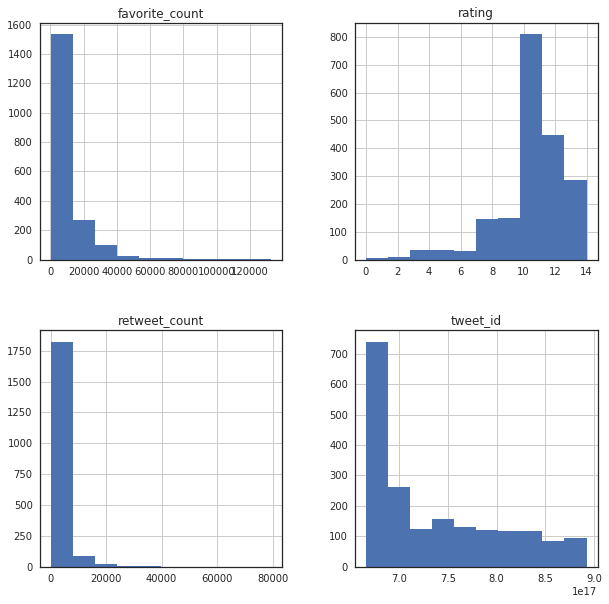

In [61]:
# Histogram
master_df_clean.hist(figsize=(10,10));

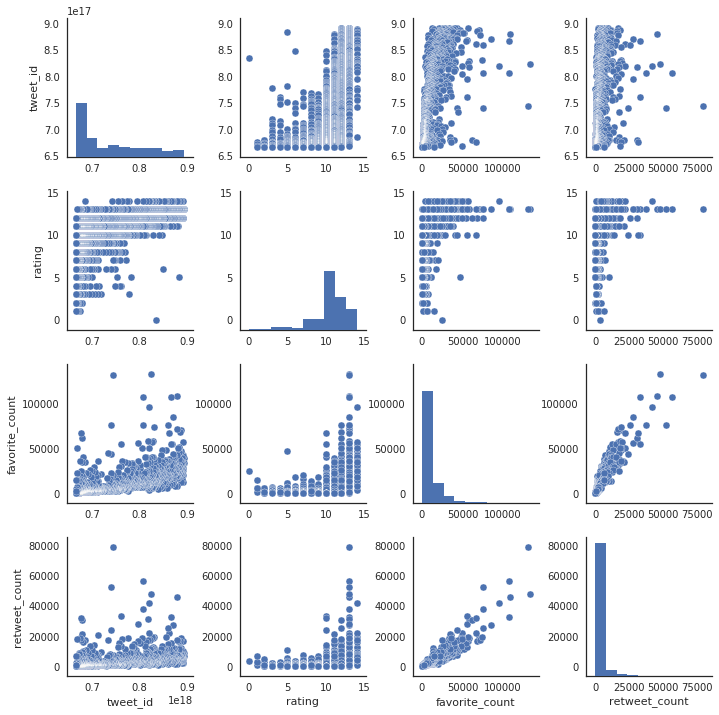

In [62]:
# Scatter plot of master_df_clean using seaborn
sns_scatterplt = sns.pairplot(master_df_clean)

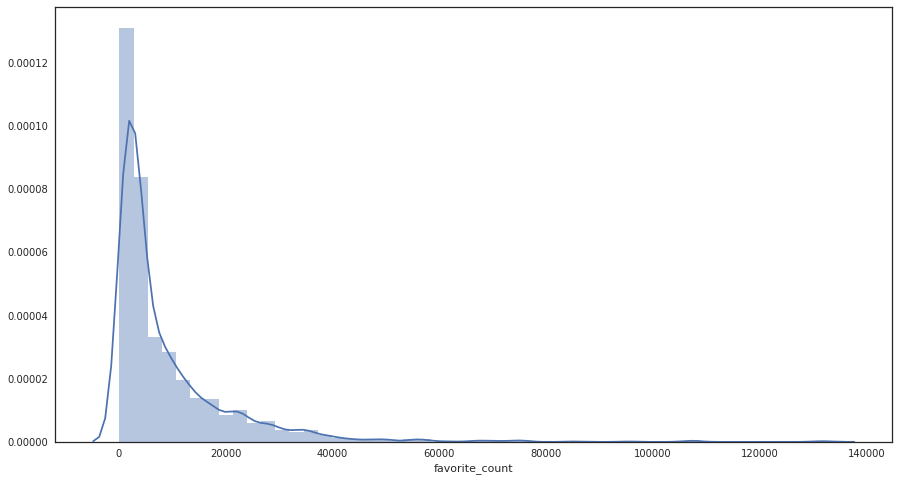

In [63]:
# Visualization for favorite_count distribution:
plt.figure(figsize=(15,8))
sns.distplot(master_df_clean.favorite_count);

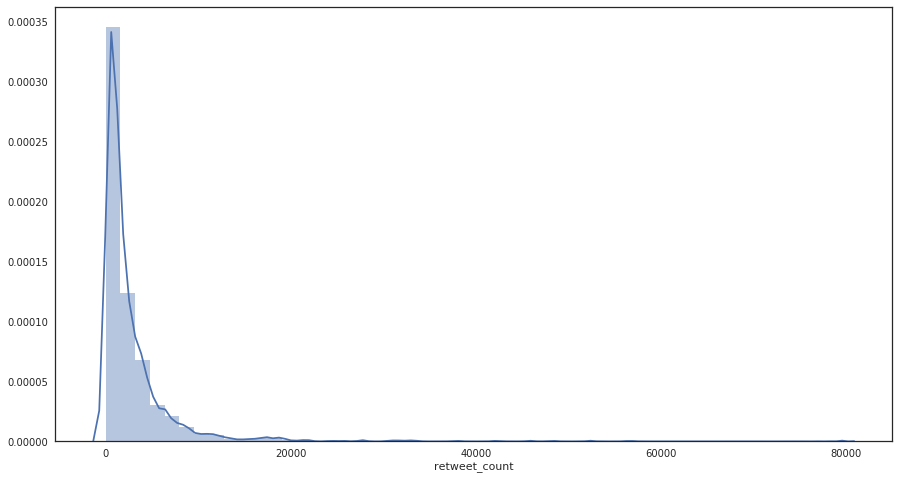

In [64]:
# Visualization for retweet_count distribution:
plt.figure(figsize=(15,8))
sns.distplot(master_df_clean.retweet_count);

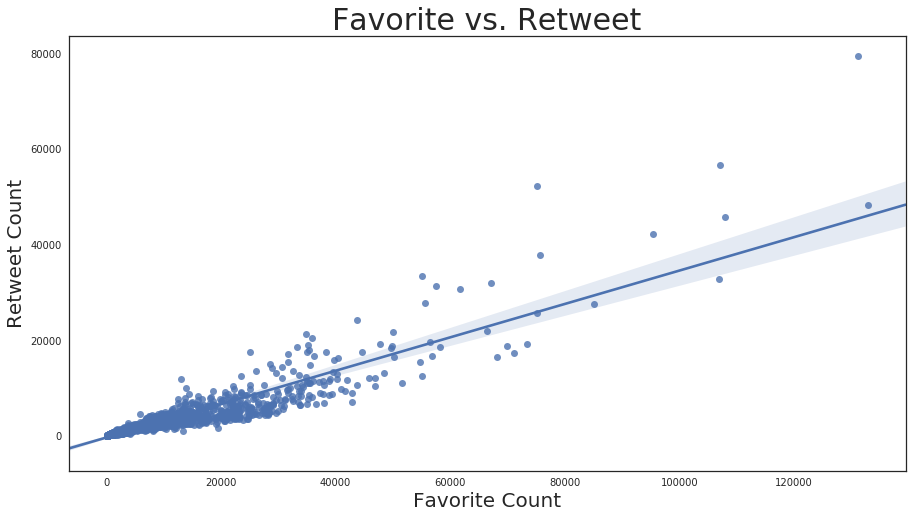

In [65]:
# Seaborn regplot
plt.figure(figsize=(15,8))
plt.title("Favorite vs. Retweet", size=30)
sns.regplot(x='favorite_count', y='retweet_count', data=master_df_clean)
plt.ylabel("Retweet Count", size=20)
plt.xlabel("Favorite Count", size=20);

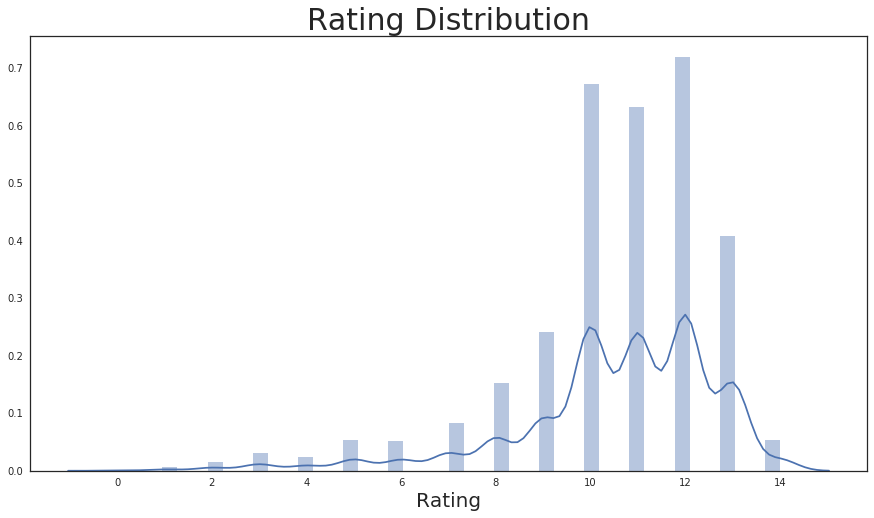

In [66]:
# Visualization for dog rating distribution:
plt.figure(figsize=(15,8))
plt.title("Rating Distribution", size=30)
sns.distplot(master_df_clean.rating)
plt.xlabel("Rating", size=20);

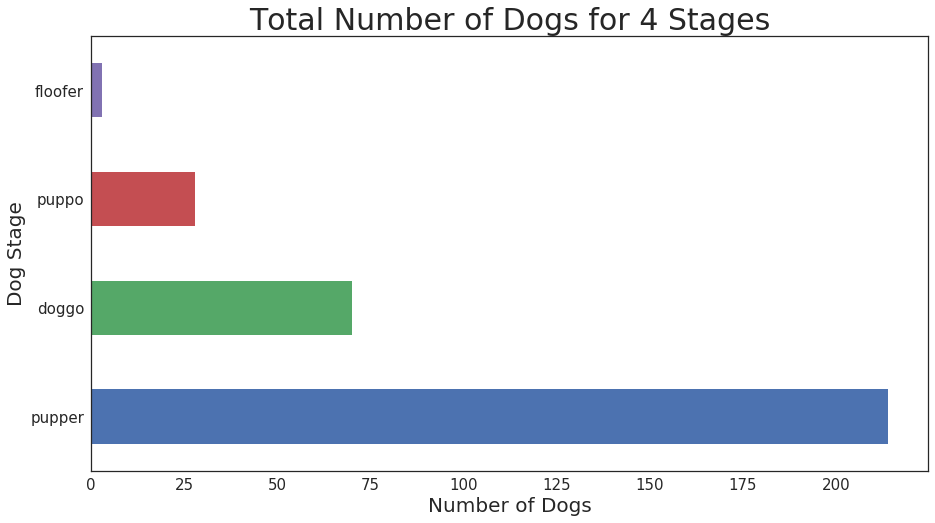

In [67]:
# Plot 4 dog stages
plt.figure(figsize=(15,8))
plt.title("Total Number of Dogs for 4 Stages", size=30)
plt.ylabel("Dog Stage", size=20)
plt.xlabel("Number of Dogs", size=20)
master_df_clean.dog_stage.value_counts().plot(kind='barh', fontsize=15);

In [68]:
# Average rating for 4 dog stages
master_df_clean.groupby(['dog_stage']).mean().rating

dog_stage
doggo      11.642857
floofer    12.666667
pupper     10.560748
puppo      12.142857
Name: rating, dtype: float64

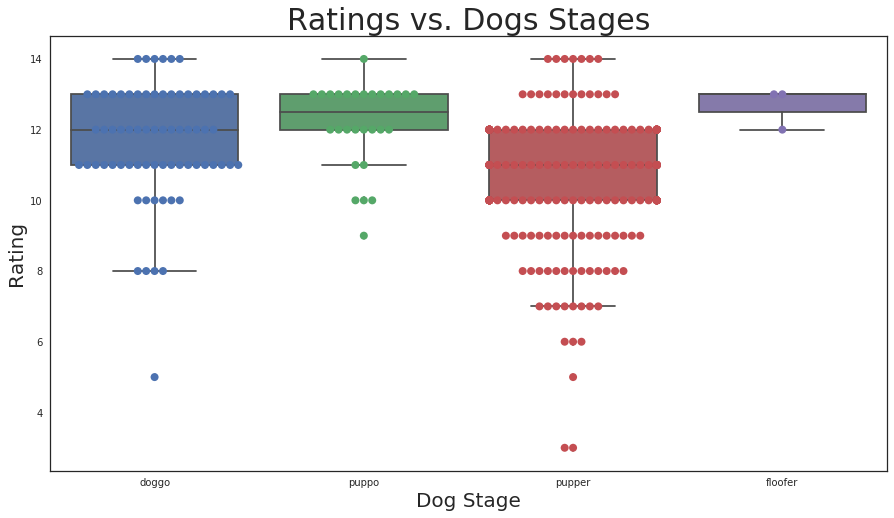

In [69]:
# Set the size of A4 paper
plt.figure(figsize=(15,8))

# Seaborn Swarmplot & Boxplot
X = master_df_clean[master_df_clean.dog_stage.notnull()]
sns.swarmplot(x="dog_stage", y="rating", data=X, size=8)
sns.boxplot(x="dog_stage", y="rating", data=X)

# Change label names and fontsizes
plt.title("Ratings vs. Dogs Stages", size=30)
plt.xlabel('Dog Stage', fontsize=20)
plt.ylabel('Rating', fontsize=20);

In [70]:
# For Dog Breed visualization, create new df with only non-null value for 
# dog_breed column
df_dog_breed = master_df_clean[master_df_clean.dog_breed.notnull()]

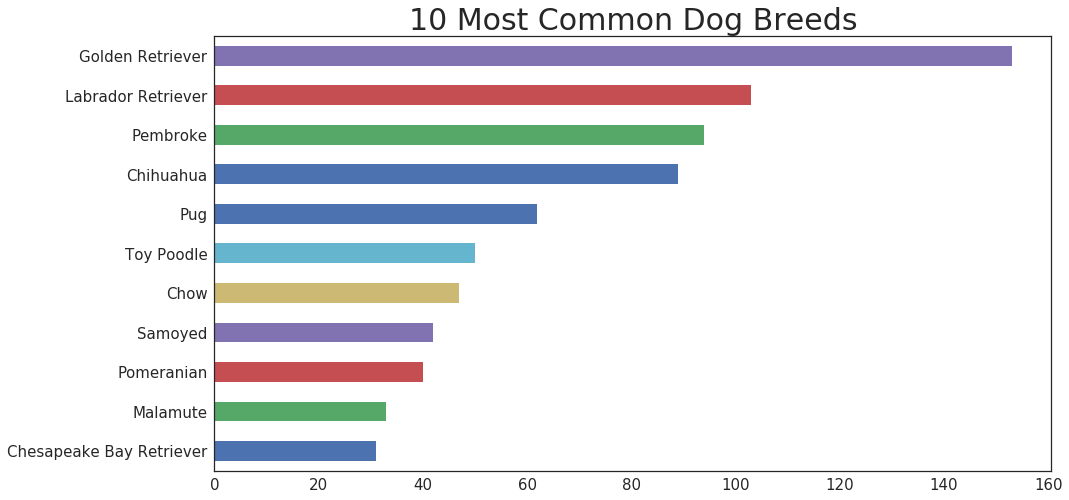

In [71]:
# Plot the 10 most common dog breeds in bar chart
plt.figure(figsize=(15,8))
plt.title("10 Most Common Dog Breeds", size=30)
df_dog_breed['dog_breed'].value_counts()[10::-1].plot(kind='barh',fontsize=15);

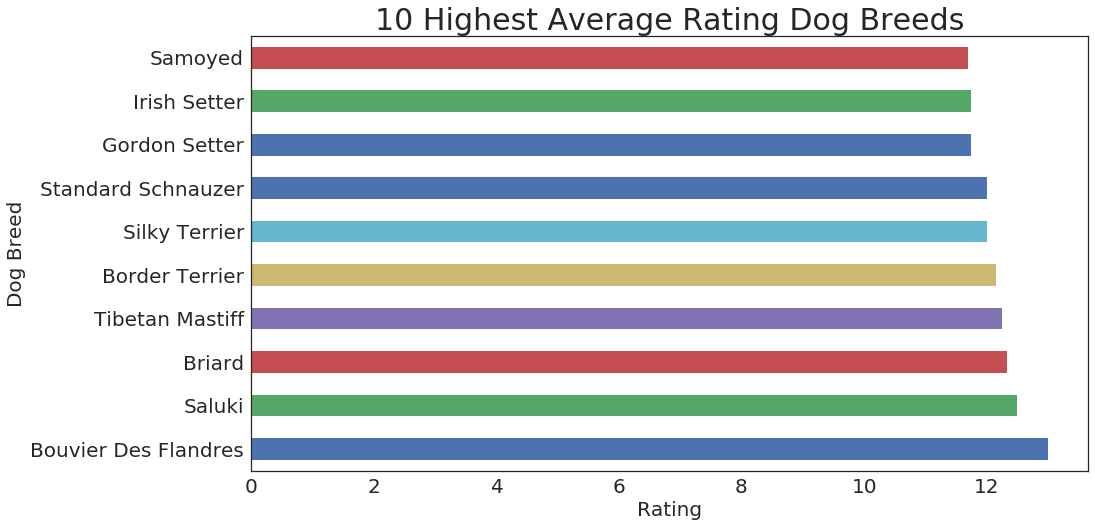

In [72]:
# Extract top 10 average rating breed
top_10_rating = master_df_clean[master_df_clean.dog_breed.notnull()]
top_10_rating = top_10_rating.groupby('dog_breed')['rating'].mean().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(15,8))
plt.title("10 Highest Average Rating Dog Breeds", size=30)
top_10_rating.plot(kind='barh',fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Dog Breed', fontsize=20);